# Image processing

## Quick review of how to convert image color model to another color model

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

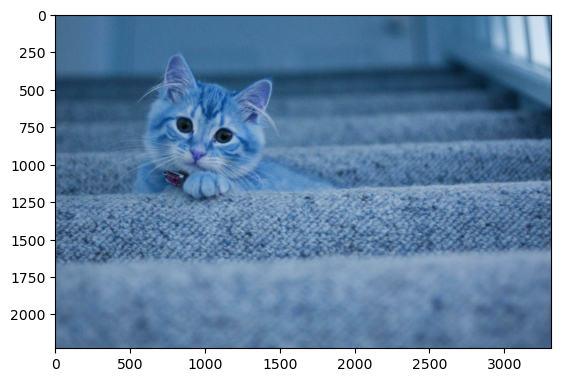

In [2]:
cat = cv.imread("Data/cute_cat.jpg")
plt.imshow(cat)

### of course as usual OpenCV uses BRG color model as default so we will convert it to our glorious RGB

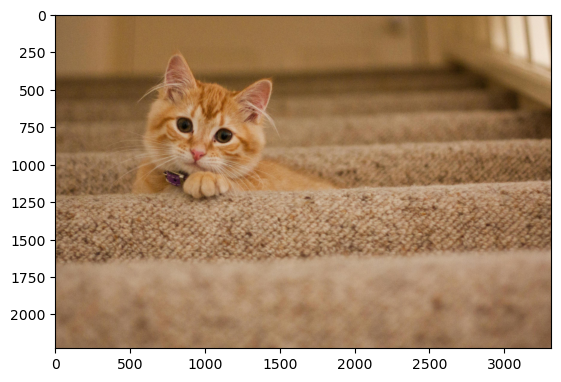

In [3]:
cat = cv.cvtColor(cat,cv.COLOR_BGR2RGB)
plt.imshow(cat)

### Great !!! But what about another famous color models like HLS or HSV , let's try them

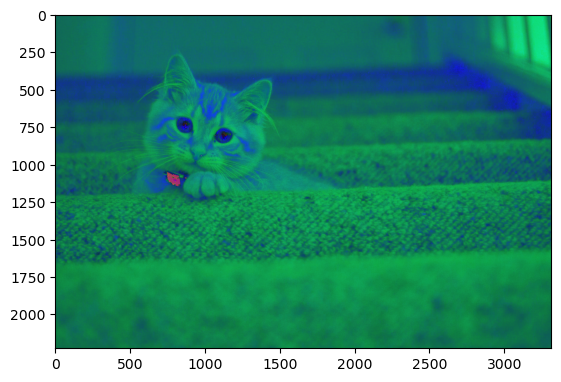

In [4]:
cat = cv.cvtColor(cat,cv.COLOR_RGB2HLS)
plt.imshow(cat)

### Wow HLS sounds disturbing in this photo, let's try HSV

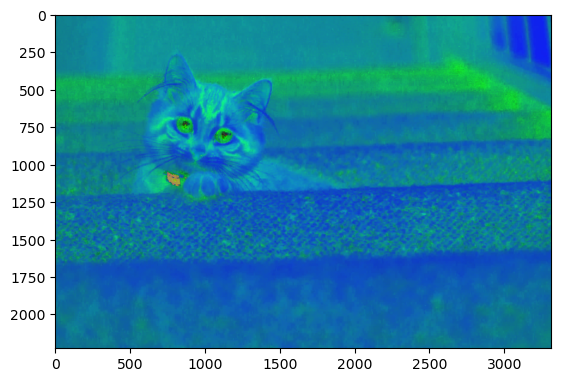

In [5]:
cat = cv.cvtColor(cat,cv.COLOR_HLS2RGB)
cat = cv.cvtColor(cat,cv.COLOR_RGB2HSV)
plt.imshow(cat)

### More disturbing indeed :) ..... so let's quit messing around and get to the real case 

## Blending images on each other (like adding a watermark)

### well, to do it in the traditional way we have to make the images at the same size

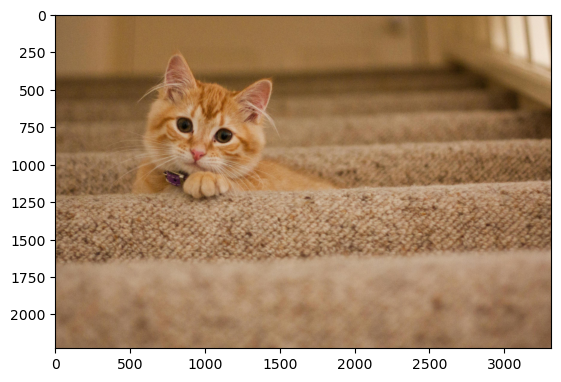

In [6]:
cat = cv.imread("Data/cute_cat.jpg")
cat = cv.cvtColor(cat,cv.COLOR_BGR2RGB)
plt.imshow(cat)

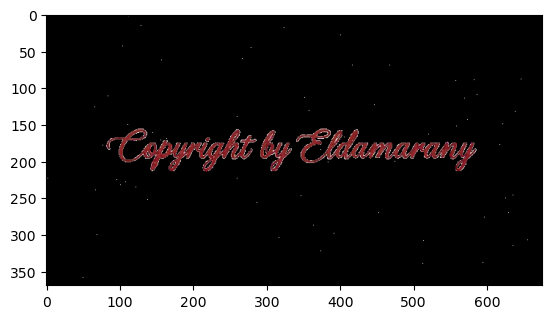

In [7]:
copyright = cv.imread("Data/copyright.png")
copyright = cv.cvtColor(copyright,cv.COLOR_BGR2RGB)
plt.imshow(copyright)

In [8]:
copyright.shape

(369, 676, 3)

In [9]:
cat.shape

(2227, 3314, 3)

In [10]:
copyright = cv.resize(copyright,(1980,1080))
cat = cv.resize(cat,(1980,1080))

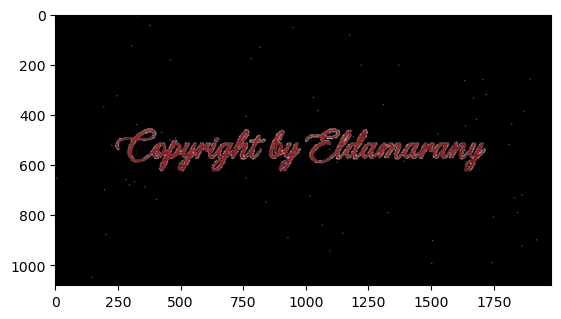

In [11]:
plt.imshow(copyright)

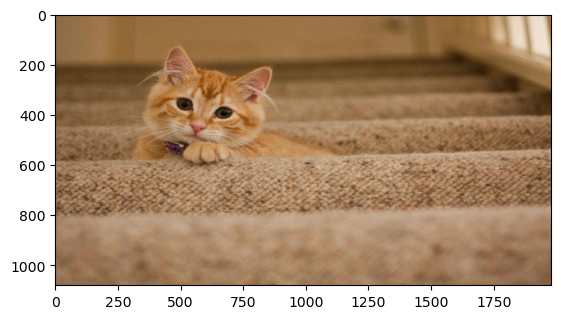

In [12]:
plt.imshow(cat)

### now that we all set up let's get to the blending function

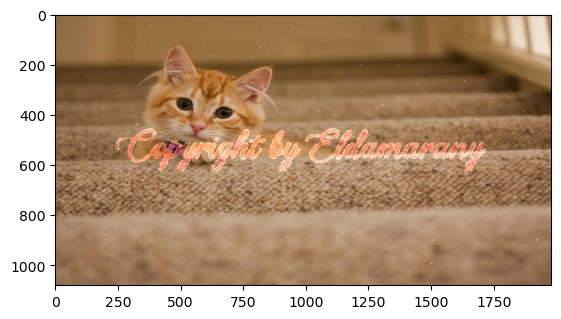

In [13]:
cat_copyright = cv.addWeighted(cat, 1, copyright, 0.7 ,0)
plt.imshow(cat_copyright)

## inserting a small image on an a bigger one 
### (or inserting any image on another image if you did resize them)

In [14]:
cat = cv.imread("Data/cute_cat.jpg")
cat = cv.cvtColor(cat, cv.COLOR_BGR2RGB)

In [15]:
cat.shape

(2227, 3314, 3)

In [16]:
dog = cv.imread("Data/puppy.jpg")
dog = cv.cvtColor(dog, cv.COLOR_BGR2RGB)

In [17]:
dog.shape

(1300, 1950, 3)

In [18]:
l_img = cat
s_img = dog

#### Predetermine the spot you want to insert the image in

In [19]:
x_offset = 0
y_offset = 0 
# you can modify them to the coordinates that you want to insert the smaller image on

#### Give the end coordinates (the image height and width)

In [20]:
x_end = x_offset + s_img.shape[1] # width
y_end = y_offset + s_img.shape[0] # height
# YOU MUST REMEMBER THE .shape METHOD OR YOU WILL HAVE A BAD TIME

#### assign the coordinates to the image you have set to insert

In [21]:
l_img[y_offset:y_end, x_offset:x_end] = s_img

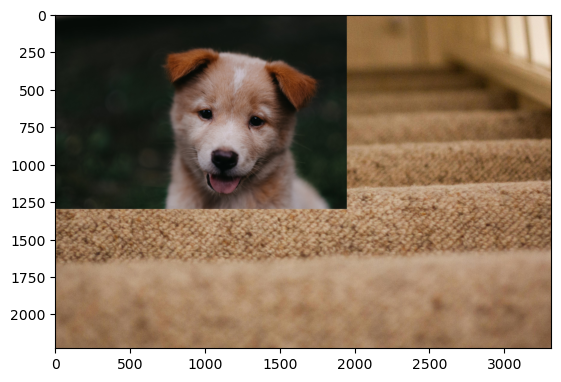

In [22]:
plt.imshow(l_img)

## Blending images of different sizes

In [23]:
cat = cv.imread("Data/cute_cat.jpg")
cat = cv.cvtColor(cat, cv.COLOR_BGR2RGB)
ball = cv.imread("Data/ball.jpg")
ball = cv.cvtColor(ball, cv.COLOR_BGR2RGB)

In [24]:
ball.shape

(750, 746, 3)

In [25]:
ball = cv.resize(ball,(1000,1000))

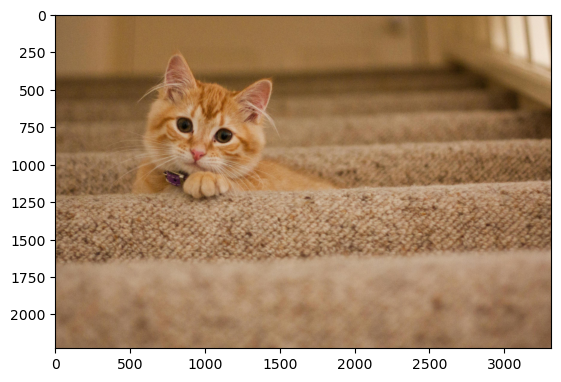

In [26]:
plt.imshow(cat)

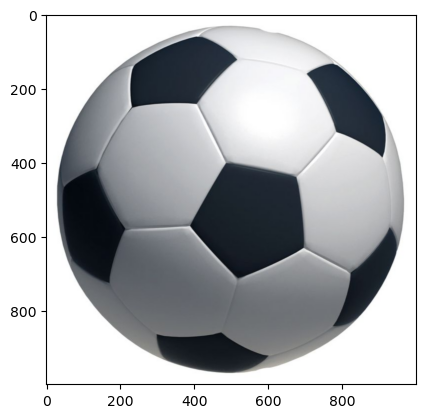

In [27]:
plt.imshow(ball)

In [28]:
ball.shape

(1000, 1000, 3)

In [29]:
cat.shape

(2227, 3314, 3)

### Making offset values for inserting the blended ball part of image later

In [30]:
x_offset = int(cat.shape[1]*(0.65)) - ball.shape[1]
y_offset = cat.shape[0] - ball.shape[0]

### this step is just for demonstration and has no meaning in our goal (because it's a ball eheheheheheeeee (bite me))

In [31]:
rows,cols,channels = ball.shape

In [32]:
rows

1000

In [33]:
cols

1000

In [34]:
channels

3

### we will now make a region of interest , whick mean that we will get a region from our original image that has the same shape as the ball shape to insert the blended ball in later

In [35]:
roi = cat[y_offset : cat.shape[0] , x_offset : int(cat.shape[1]*(0.65))]

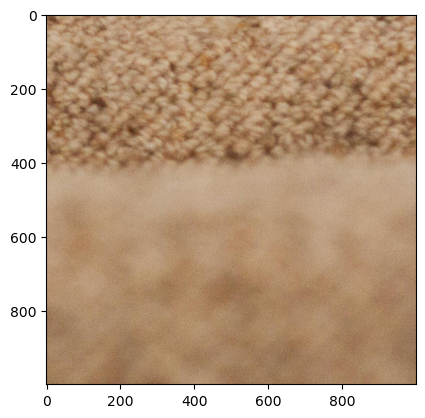

In [36]:
plt.imshow(roi)

### converting the ball to the grayscale

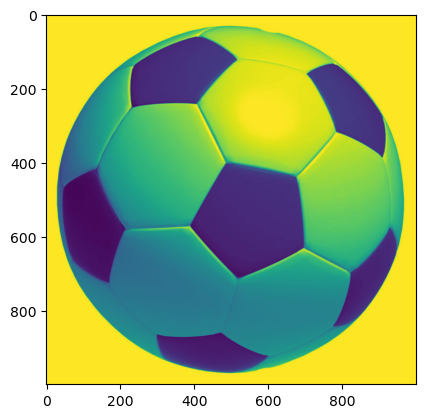

In [37]:
gray_ball = cv.cvtColor(ball,cv.COLOR_RGB2GRAY)
plt.imshow(gray_ball)

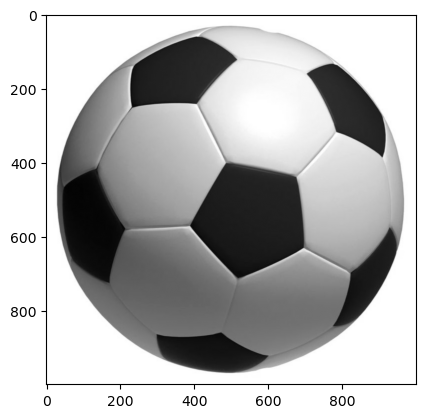

In [38]:
plt.imshow(gray_ball , cmap = "gray")

### inversing the grayscale ball color for further operations

In [39]:
mask_ball = cv.bitwise_not(gray_ball)

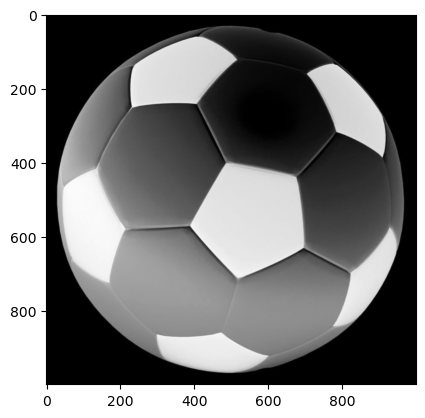

In [40]:
plt.imshow(mask_ball , cmap = "gray")

In [42]:
mask_ball.shape # no longer has 3 color channels

(1000, 1000)

### Now with the most complicated step

### we will make a white background, filter the ball through it to give us an example the shape of a white ball with a black background as we wanted

In [43]:
import numpy as np

In [44]:
white_background = np.full(ball.shape,255,dtype=np.uint8)

In [45]:
bk = cv.bitwise_and(white_background,white_background, mask = mask_ball)

In [46]:
bk.shape

(1000, 1000, 3)

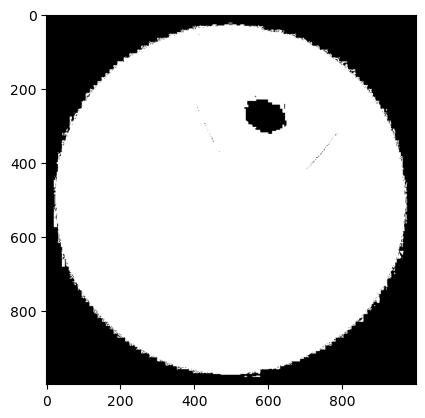

In [47]:
plt.imshow(bk)

#### oh wow congratulations , our ball have a hole now (bringing back memories?)

### we will insert our ball using (bitwise or) as the example above

In [48]:
fg = cv.bitwise_or(ball, ball, mask = mask_ball)

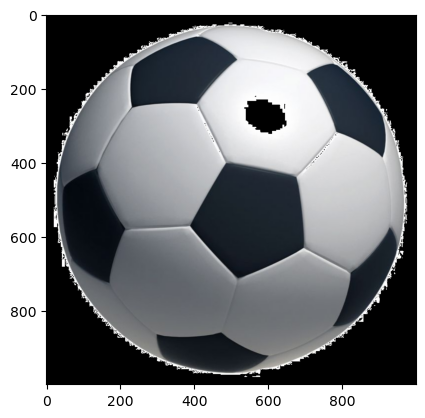

In [49]:
plt.imshow(fg)

## we will now mask the ball in our region of interest that we've detemined earlier

### Let's just hope it doesn't get any worse

In [50]:
final_roi = cv.bitwise_or(roi,fg)

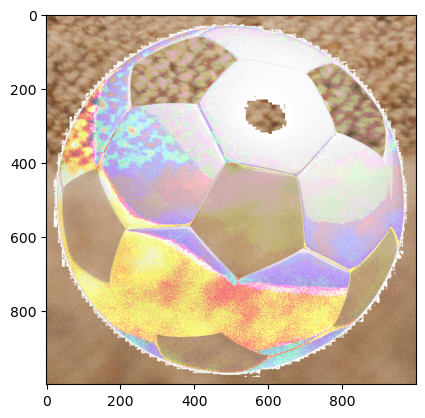

In [51]:
plt.imshow(final_roi)

#### Oh suuuuuuuuuuuuure, not expected at alllllll, who would've guessed :| ?

### we will now use our pervious method to insert an image to another but this time it wouldn't be like it was done this way (due to final_roi and everything)

In [52]:
l_img = cat
s_img = final_roi

In [53]:
l_img[y_offset:y_offset+s_img.shape[0], x_offset:x_offset+s_img.shape[1]] = s_img

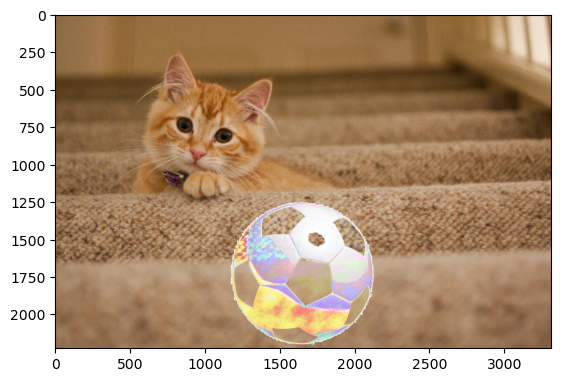

In [54]:
plt.imshow(l_img)

### And just like that we have a cat chasing a ghost ball 
### seems noraml and not photoshop or creepy at all

## i'm getting nuts 
## goodbye guys thanks for reading this very 'entertainig experience'